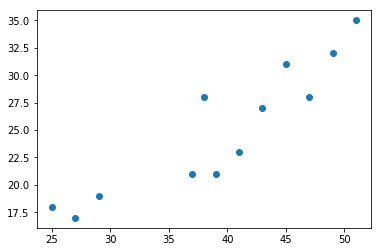

In [8]:
import numpy as np                                                                #importing respsective libraries
import matplotlib.pyplot as plt
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

plt.figure(figsize=(6, 4))
plt.scatter(temp_max, temp_min)                                             #plotting the data

Text(0,0.5,'Min and max temperature')

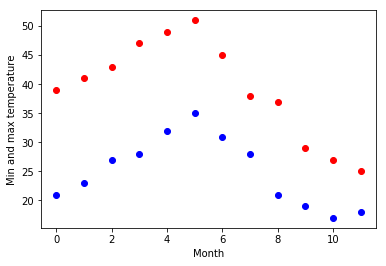

In [9]:
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')                                               #plotting the labels and temparatue maximum and minimum points
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [10]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,                  #using optimization to find maximum and minimum
                                      temp_min, [-40, 20, 0])

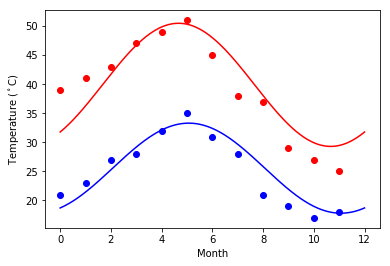

In [11]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')                                              #Plotting the results
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [ ]:
# pie chart

In [1]:
import pandas as pd
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv",delimiter =",")

In [2]:
titanic.head()                   #read the data and display top few rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [20]:
titanic_g=titanic.groupby("sex").count()
titanic_g.reset_index(drop=False,inplace =True)           #group by sex and count the number of instances
print(titanic_g)
#titanic_g.head()

      sex  pclass  survived  name  age  sibsp  parch  ticket  fare  cabin  \
0  female     466       466   466  388    466    466     466   466    141   
1    male     843       843   843  658    843    843     843   842    154   

   embarked  boat  body  home.dest  
0       464   319     8        288  
1       843   167   113        457  


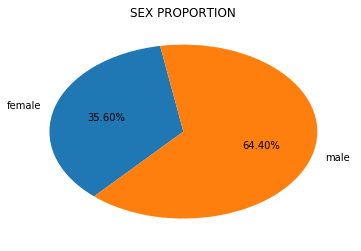

In [22]:
import matplotlib.pyplot as plt
plt.pie(titanic_g["name"],labels=titanic_g["sex"],autopct="%1.2f%%",shadow = False,startangle = 100)
plt.title("SEX PROPORTION")                              # plotting respective piechart showing ratio as per autopct description to display 2 digits after decimal
plt.show()

In [ ]:
#Scatter plot

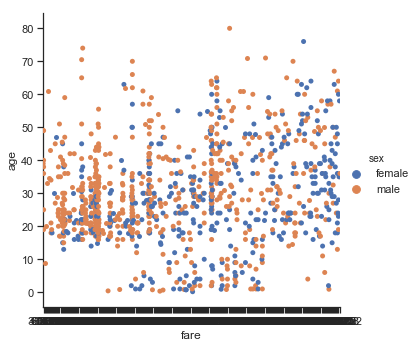

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt                                #categorical scatter plot
sns.set(style="ticks", color_codes=True)
sns.catplot(x="fare", y="age", hue="sex", kind="swarm", data=titanic)